# Classification for Stunting Dataset

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

## Load Dataset

In [23]:
df = pd.read_csv("/home/rmfarizky/Project/deteksi_stunting/Dataset/encoded_dataset.csv")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   j_kel             624 non-null    int64  
 1   usia_ukur(bulan)  624 non-null    int64  
 2   berat             624 non-null    float64
 3   tinggi            624 non-null    float64
 4   Z_BB/TB           624 non-null    float64
 5   Z_BB/U            624 non-null    float64
 6   Z_TB/U            624 non-null    float64
 7   Z_IMT/U           624 non-null    float64
 8   BB/TB             624 non-null    int64  
 9   BB/U              624 non-null    int64  
 10  TB/U              624 non-null    int64  
 11  IMT/U             624 non-null    int64  
dtypes: float64(6), int64(6)
memory usage: 58.6 KB


In [25]:
df.columns

Index(['j_kel', 'usia_ukur(bulan)', 'berat', 'tinggi', 'Z_BB/TB', 'Z_BB/U',
       'Z_TB/U', 'Z_IMT/U', 'BB/TB', 'BB/U', 'TB/U', 'IMT/U'],
      dtype='object')

In [26]:
df.head()

,j_kel,usia_ukur(bulan),berat,tinggi,Z_BB/TB,Z_BB/U,Z_TB/U,Z_IMT/U,BB/TB,BB/U,TB/U,IMT/U
0,0,58,13.1,97.5,-0.53,0.52,1.24,-0.22,0,2,0,0
1,1,57,12.2,98.5,-1.87,-1.94,-0.89,-1.95,0,2,0,0
2,1,56,12.6,95.5,-0.95,-1.43,-1.15,-1.05,0,2,0,0
3,0,55,14.2,99.3,-0.40,-1.42,-1.96,-0.36,0,2,0,0
4,1,53,13.2,97.0,-0.97,-1.38,-1.18,-0.96,0,2,0,0


# Working on IMT/U

In this classification task, our focus will be on  `IMT/U` category, which contains six labels:

0. Gizi Baik
1. Gizi Buruk
2. Gizi Kurang
3. Gizi Lebih
4. Obesitas
5. Resiko Gizi Lebih

## Define the DataFrame

In [27]:
features = ['j_kel', 'usia_ukur(bulan)', 'berat', 'tinggi','Z_BB/TB', 'Z_BB/U','Z_TB/U', 'Z_IMT/U']
target = ['BB/TB', 'BB/U', 'TB/U', 'IMT/U']

In [28]:
df_IMT = df[df.columns[:4].tolist() + [df.columns[7]] + [df.columns[-1]]]
df_IMT

,j_kel,usia_ukur(bulan),berat,tinggi,Z_IMT/U,IMT/U
0,0,58,13.1,97.5,-0.22,0
1,1,57,12.2,98.5,-1.95,0
2,1,56,12.6,95.5,-1.05,0
3,0,55,14.2,99.3,-0.36,0
4,1,53,13.2,97.0,-0.96,0
...,...,...,...,...,...,...
619,1,9,7.0,67.5,-0.68,0
620,0,9,7.6,67.5,-1.06,0
621,1,7,6.5,65.0,-2.12,2
622,1,7,6.1,65.5,-1.18,0


## Multiple Linear Regression With scikit-learn

In [29]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [30]:
X = df_IMT[df_IMT.columns[4]]
X

0     -0.22
1     -1.95
2     -1.05
3     -0.36
4     -0.96
       ... 
619   -0.68
620   -1.06
621   -2.12
622   -1.18
623   -0.19
Name: Z_IMT/U, Length: 624, dtype: float64

In [31]:
X = df_IMT[df_IMT.columns[:4]]
y = df_IMT[df_IMT.columns[4]]
X, y = np.array(X), np.array(y)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [34]:
predictions = regressor.predict(X_test)

In [35]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.2578514908638343


## Naive Bayes

In [36]:
df_IMT

,j_kel,usia_ukur(bulan),berat,tinggi,Z_IMT/U,IMT/U
0,0,58,13.1,97.5,-0.22,0
1,1,57,12.2,98.5,-1.95,0
2,1,56,12.6,95.5,-1.05,0
3,0,55,14.2,99.3,-0.36,0
4,1,53,13.2,97.0,-0.96,0
...,...,...,...,...,...,...
619,1,9,7.0,67.5,-0.68,0
620,0,9,7.6,67.5,-1.06,0
621,1,7,6.5,65.0,-2.12,2
622,1,7,6.1,65.5,-1.18,0


In [37]:
X = df_IMT[df_IMT.columns[:4]]
y = df_IMT[df_IMT.columns[5]]
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan melatih model Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
naive_bayes_predictions = naive_bayes_model.predict(X_test)

# Menghitung akurasi
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
print("Akurasi Naive Bayes:", naive_bayes_accuracy)

Akurasi Naive Bayes: 0.704


## Decision Tree Algoritm

In [38]:
import tensorflow_decision_forests as tfdf
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math

In [40]:
df_IMT = df_IMT.drop(columns='Z_IMT/U')

In [41]:
df_IMT

,j_kel,usia_ukur(bulan),berat,tinggi,IMT/U
0,0,58,13.1,97.5,0
1,1,57,12.2,98.5,0
2,1,56,12.6,95.5,0
3,0,55,14.2,99.3,0
4,1,53,13.2,97.0,0
...,...,...,...,...,...
619,1,9,7.0,67.5,0
620,0,9,7.6,67.5,0
621,1,7,6.5,65.0,2
622,1,7,6.1,65.5,0


In [42]:
label = "IMT/U"

classes = df_IMT[label].unique().tolist()
print(f"Label classes: {classes}")

df_IMT[label] = df_IMT[label].map(classes.index)

Label classes: [0, 2, 5, 1, 3, 4]


In [43]:
def split_dataset(dataset, test_ratio=0.3):
  #Splits a panda dataframe in two
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]


train_ds, test_ds = split_dataset(df_IMT)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds), len(test_ds)))

435 examples in training, 189 examples for testing.


In [44]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds, label=label)

2023-10-08 18:28:13.359923: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-08 18:28:13.360741: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [45]:
# Specify the model.
model_1 = tfdf.keras.RandomForestModel(verbose=2)

# Train the model.
model_1.fit(train_ds)

Use 8 thread(s) for training
Use /tmp/tmpoavl7m6d as temporary training directory
Reading training dataset...


Training tensor examples:
Features: {'j_kel': <tf.Tensor 'data:0' shape=(None,) dtype=int64>, 'usia_ukur(bulan)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'berat': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'tinggi': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>}
Label: Tensor("data_4:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'j_kel': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'usia_ukur(bulan)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'berat': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'tinggi': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_3:0' shape=(None,) dtype=float32>)}
Training dataset read in 0:00:06.819768. Found 435 examples.
Training model...
Standard output detected as not visible to the user e.

[INFO 23-10-08 18:28:22.1884 WITA kernel.cc:773] Start Yggdrasil model training
[INFO 23-10-08 18:28:22.1885 WITA kernel.cc:774] Collect training examples
[INFO 23-10-08 18:28:22.1885 WITA kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 23-10-08 18:28:22.1893 WITA kernel.cc:393] Number of batches: 1
[INFO 23-10-08 18:28:22.1893 WITA kernel.cc:394] Number of examples: 435
[INFO 23-10-08 18:28:22.1894 WITA kernel.cc:794] Training dataset:
Number of records: 435
Number of columns: 5

Number of columns by type:
	NUMERICAL: 4 (80%)
	CATEGORICAL: 1 (20%)

Columns:

NUMERICAL: 4 (80%)
	1: "berat" NUMERICAL mean:10.6487 min:3.2 max:23.6 sd:2.79896
	2: "j_

Model trained in 0:00:00.398993
Compiling model...
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [51]:
model_1.compile(metrics=["accuracy"])
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 1s 664ms/step - loss: 0.0000e+00 - accuracy: 0.8360

loss: 0.0000
accuracy: 0.8360


In [53]:
tfdf.model_plotter.plot_model_in_colab(model_1, tree_idx=0, max_depth=3)

In [48]:
model_1.summary()

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (4):
	berat
	j_kel
	tinggi
	usia_ukur(bulan)

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.           "tinggi"  0.430636 ################
    2.            "berat"  0.334516 ##########
    3. "usia_ukur(bulan)"  0.303930 ########
    4.            "j_kel"  0.154423 

Variable Importance: NUM_AS_ROOT:
    1.           "tinggi" 137.000000 ################
    2.            "berat" 78.000000 ########
    3. "usia_ukur(bulan)" 77.000000 ########
    4.            "j_kel"  8.000000 

Variable Importance: NUM_NODES:
    1.           "tinggi" 3971.000000 ################
    2.          

In [49]:
model_1.make_inspector().evaluation()

Evaluation(num_examples=435, accuracy=0.8528735632183908, loss=2.7120809622344444, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

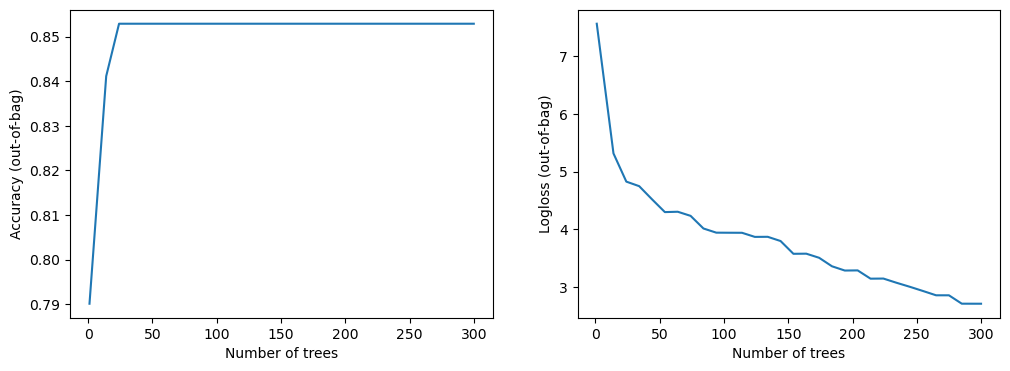

In [50]:
import matplotlib.pyplot as plt

logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()